# The blood transfusion dataset

In this notebook, we will present the "blood transfusion" dataset. This
dataset is locally available in the directory `datasets` and it is stored as a
comma separated value (CSV) file. We start by loading the entire dataset.

In [ ]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")

We can have a first look at the at the dataset loaded.

In [ ]:
blood_transfusion.head()

In this dataframe, we can see that the last column correspond to the target to
be predicted called `"Class"`. We will create two variables, `data` and
`target` to separate the data from which we could learn a predictive model and
the `target` that should be predicted.

In [ ]:
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

Let's have a first look at the `data` variable.

In [ ]:
data.head()

We observe four columns. Each record corresponds to a person that intended to
give blood. The information stored in each column are:

* `Recency`: the time in months since the last time a person intended to give
  blood;
* `Frequency`: the number of time a person intended to give blood in the past;
* `Monetary`: the amount of blood given in the past (in cm³);
* `Time`: the time in months since the first time a person intended to give
  blood.

Now, let's have a look regarding the type of data that we are dealing in these
columns and if any missing values are present in our dataset.

In [ ]:
data.info()

Our dataset is made of 748 samples. All features are represented with integer
numbers and there is no missing values. We can have a look at each feature
distributions.

In [ ]:
_ = data.hist(figsize=(12, 10), bins=30, edgecolor="black")

There is nothing shocking regarding the distributions. We only observe a high
value range for the features `"Recency"`, `"Frequency"`, and `"Monetary"`. It
means that we have a few extreme high values for these features.

Now, let's have a look at the target that we would like to predict for this
task.

In [ ]:
target.head()

In [ ]:
import matplotlib.pyplot as plt

target.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Class distribution")

We see that the target is discrete and contains two categories: whether a
person `"donated"` or `"not donated"` his/her blood. Thus the task to be
solved is a classification problem. We should note that the class counts of
these two classes is different.

In [ ]:
target.value_counts(normalize=True)

Indeed, ~76% of the samples belong to the class `"not donated"`. It is rather
important: a classifier that would predict always this `"not donated"` class
would achieve an accuracy of 76% of good classification without using any
information from the data itself. This issue is known as class imbalance. One
should take care about the generalization performance metric used to evaluate
a model as well as the predictive model chosen itself.

Now, let's have a naive analysis to see if there is a link between features
and the target using a pair plot representation.

In [ ]:
import seaborn as sns

_ = sns.pairplot(blood_transfusion, hue="Class")

Looking at the diagonal plots, we don't see any feature that individually
could help at separating the two classes. When looking at a pair of feature,
we don't see any striking combinations as well. However, we can note that the
`"Monetary"` and `"Frequency"` features are perfectly correlated: all the data
points are aligned on a diagonal.

As a conclusion, this dataset would be a challenging dataset: it suffer from
class imbalance, correlated features and thus very few features will be
available to learn a model, and none of the feature combinations were found to
help at predicting.

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent"))
scores = cross_validate(model, data, target, cv=5)
(scores['test_score'].mean(), scores['test_score'].std())

(np.float64(0.7620402684563758), np.float64(0.002498808328208341))

In [7]:
scores = cross_validate(model, data, target, cv=5, scoring="balanced_accuracy")
(scores['test_score'].mean(), scores['test_score'].std())

(np.float64(0.5), np.float64(0.0))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
scores = cross_validate(model, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True)
scores

{'fit_time': array([0.00278282, 0.00178409, 0.00183296, 0.00172305, 0.00135279,
        0.00120926, 0.00120211, 0.00112987, 0.00112319, 0.00113177]),
 'score_time': array([0.00223017, 0.00161195, 0.00161982, 0.00121903, 0.00124812,
        0.00115991, 0.00110793, 0.00110006, 0.00103974, 0.00101614]),
 'test_score': array([0.51315789, 0.49122807, 0.4751462 , 0.2997076 , 0.39473684,
        0.43859649, 0.56432749, 0.58333333, 0.45665635, 0.50309598]),
 'train_score': array([0.8909174 , 0.89357943, 0.89458455, 0.89384137, 0.89320785,
        0.88635478, 0.88148148, 0.87465887, 0.89300546, 0.87503178])}

Text(0.5, 1.0, 'KNeighborsClassifier')

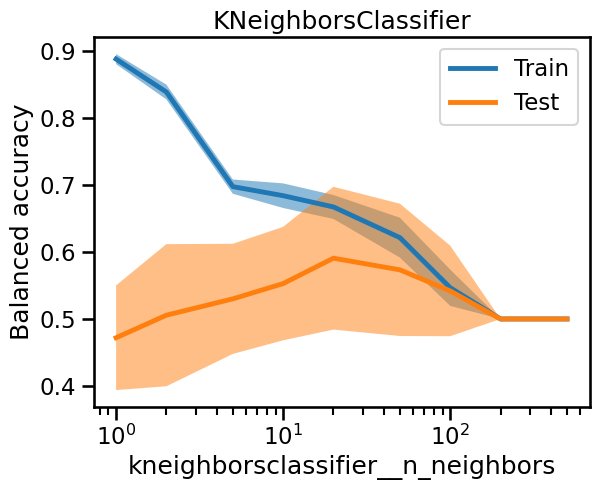

In [17]:
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    scoring="balanced_accuracy",
    cv=10,
    n_jobs=2,
)

disp.ax_.set_title("KNeighborsClassifier")